## Introduction
A brief overview of the objective: Analyze churn patterns and identify key drivers of customer attrition.

### 1. Data Cleaning and Preparation.

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\ADMIN\Downloads\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
print("Nan after conversion:", df['TotalCharges'].isnull().sum())

Nan after conversion: 11


In [16]:
df = df[df['TotalCharges'].notnull()]
df.reset_index(drop = True, inplace = True)

In [17]:
df.drop(columns = ['customerID'], inplace = True)

In [18]:
categorical_cols = df.select_dtypes(include='object').columns  

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower() 

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'male']
Partner: ['yes' 'no']
Dependents: ['no' 'yes']
PhoneService: ['no' 'yes']
MultipleLines: ['no phone service' 'no' 'yes']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['no' 'yes' 'no internet service']
StreamingTV: ['no' 'yes' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']
Contract: ['month-to-month' 'one year' 'two year']
PaperlessBilling: ['yes' 'no']
PaymentMethod: ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Churn: ['no' 'yes']


In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [35]:
# Lowercase column names and remove spaces (optional but helps)
df.columns = df.columns.str.lower().str.replace(' ', '')

# Check if expected columns are present
expected_columns = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
                    'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                    'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
                    'paperlessbilling', 'paymentmethod', 'churn']

for col in expected_columns:
    if col not in df.columns:
        print(f"Missing column: {col}")

# Gender
df['gender'] = df['gender'].replace({'male': 'Male', 'female': 'Female'})

# Partner & Dependents
df['partner'] = df['partner'].replace({'yes': 'Yes', 'no': 'No'})
df['dependents'] = df['dependents'].replace({'yes': 'Yes', 'no': 'No'})

# Phone & Multiple Lines
df['phoneservice'] = df['phoneservice'].replace({'yes': 'Yes', 'no': 'No'})
df['multiplelines'] = df['multiplelines'].replace({'yes': 'Yes', 'no': 'No', 'no phone service': 'No Phone Service'})

# Internet-related
df['internetservice'] = df['internetservice'].replace({
    'dsl': 'DSL', 
    'fiber optic': 'Fiber Optic', 
    'no': 'No'
})

df['onlinesecurity'] = df['onlinesecurity'].replace({
    'yes': 'Yes', 
    'no': 'No', 
    'no internet service': 'No Internet Service'
})
df['onlinebackup'] = df['onlinebackup'].replace({
    'yes': 'Yes', 
    'no': 'No', 
    'no internet service': 'No Internet Service'
})
df['deviceprotection'] = df['deviceprotection'].replace({
    'yes': 'Yes', 
    'no': 'No', 
    'no internet service': 'No Internet Service'
})
df['techsupport'] = df['techsupport'].replace({
    'yes': 'Yes', 
    'no': 'No', 
    'no internet service': 'No Internet Service'
})
df['streamingtv'] = df['streamingtv'].replace({
    'yes': 'Yes', 
    'no': 'No', 
    'no internet service': 'No Internet Service'
})
df['streamingmovies'] = df['streamingmovies'].replace({
    'yes': 'Yes', 
    'no': 'No', 
    'no internet service': 'No Internet Service'
})

# Contract, Billing & Payment
df['contract'] = df['contract'].replace({
    'month-to-month': 'Month-to-Month', 
    'one year': 'One Year', 
    'two year': 'Two Year'
})
df['paperlessbilling'] = df['paperlessbilling'].replace({'yes': 'Yes', 'no': 'No'})
df['paymentmethod'] = df['paymentmethod'].replace({
    'electronic check': 'Electronic Check',
    'mailed check': 'Mailed Check',
    'bank transfer (automatic)': 'Bank Transfer (Auto)',
    'credit card (automatic)': 'Credit Card (Auto)'
})

# Churn
df['churn'] = df['churn'].replace({'yes': 'Yes', 'no': 'No'})

# Save
df.to_csv('cleaned_customer_churn_data.csv', index=False)

## 2. Exploratory Data Analysis (EDA).

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 


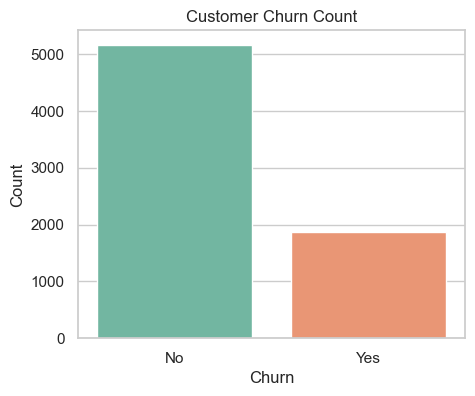

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x='churn', hue='churn', data=df, palette='Set2', legend=False)
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

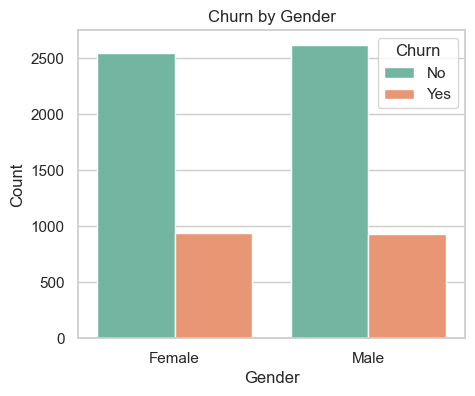

In [56]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='churn', data=df, palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

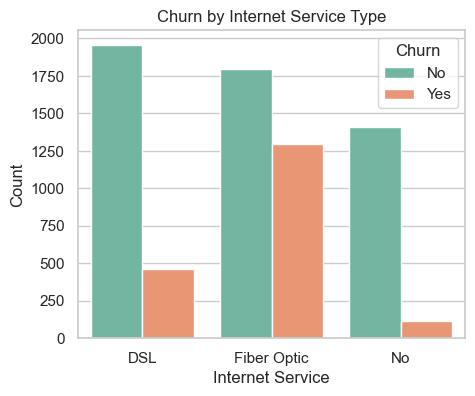

In [57]:
plt.figure(figsize=(5,4))
sns.countplot(x='internetservice', hue='churn', data=df, palette='Set2')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

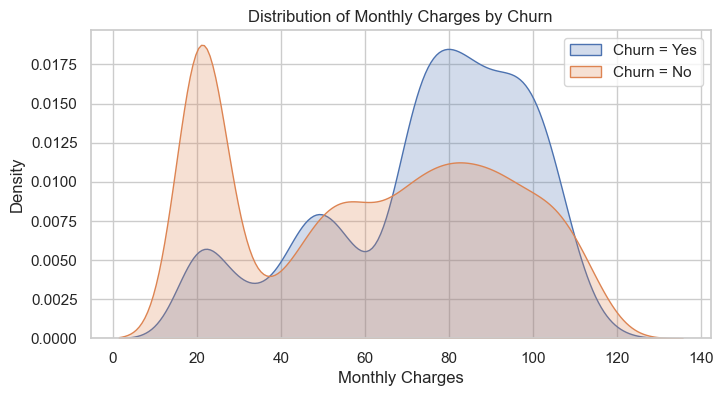

In [48]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['churn']=='Yes']['monthlycharges'], label='Churn = Yes', fill=True)
sns.kdeplot(df[df['churn']=='No']['monthlycharges'], label='Churn = No', fill=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

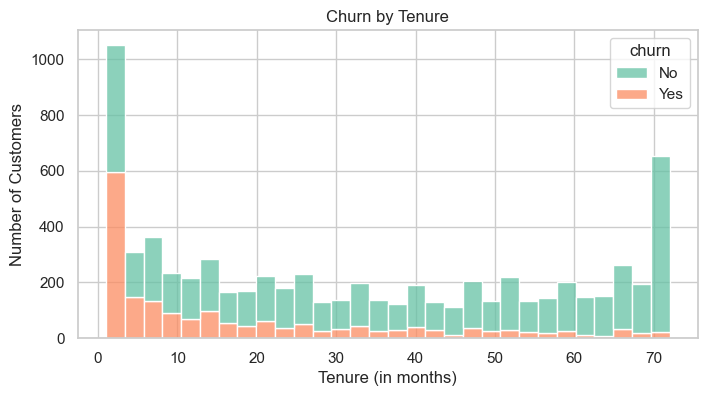

In [50]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='churn', multiple='stack', bins=30, palette='Set2')
plt.title('Churn by Tenure')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Customers')
plt.show()

In [52]:
df['churn_encoded'] = df['churn'].map({'Yes': 1, 'No': 0})

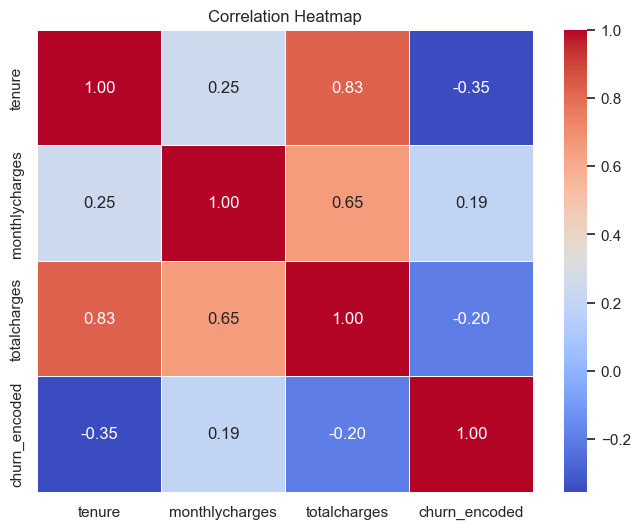

In [82]:
# Select numeric columns
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges', 'churn_encoded']
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

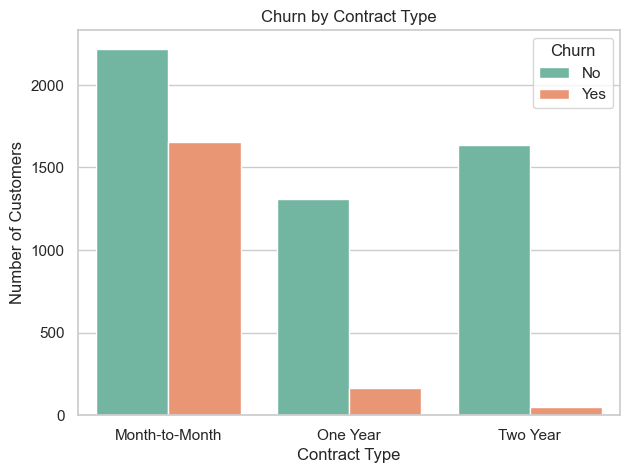

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='contract', hue='churn', palette='Set2')

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

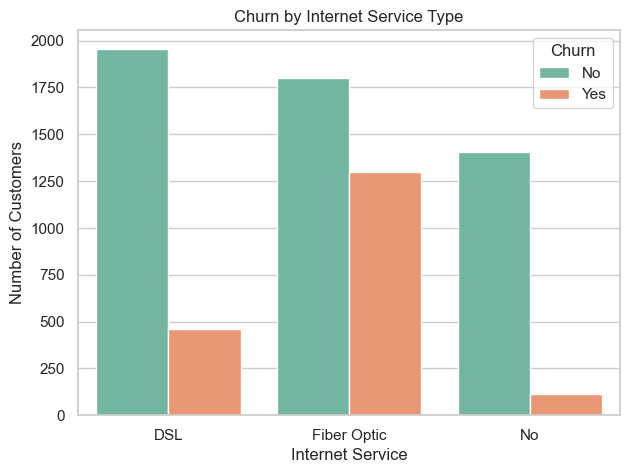

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='internetservice', hue='churn', palette='Set2')

plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

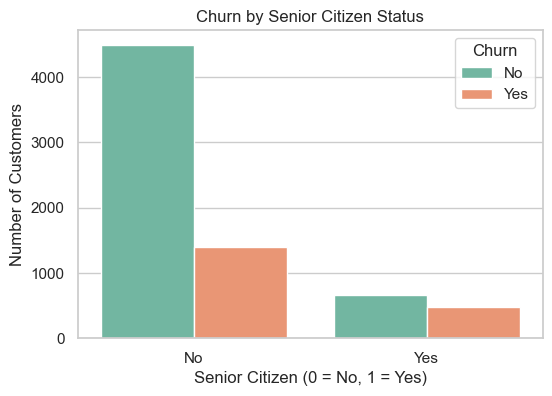

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='seniorcitizen', hue='churn', palette='Set2')

plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

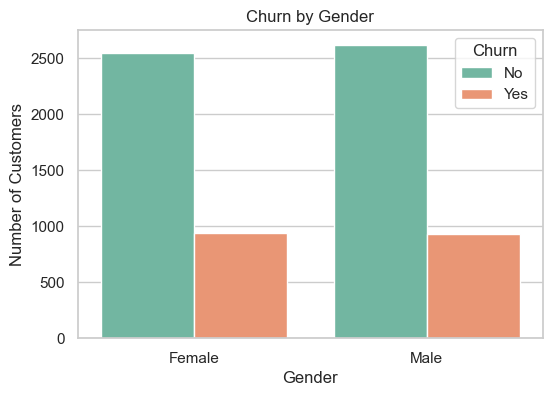

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='churn', palette='Set2')

plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

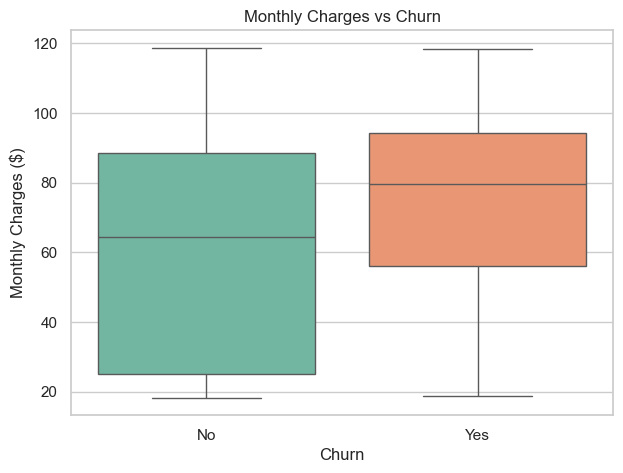

In [72]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='churn', y='monthlycharges', hue='churn', palette='Set2', legend=False)

plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

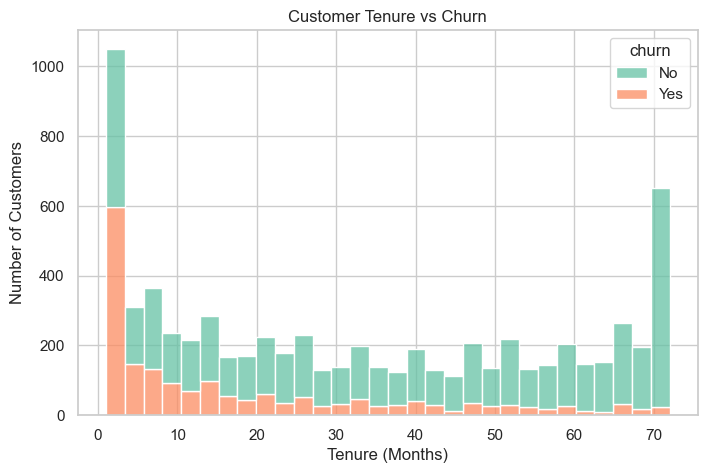

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='churn', multiple='stack', bins=30, palette='Set2')

plt.title('Customer Tenure vs Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

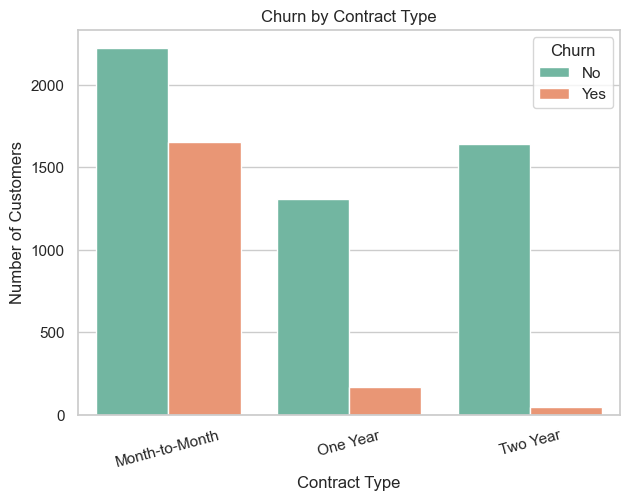

In [78]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='contract', hue='churn', palette='Set2')

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.show()

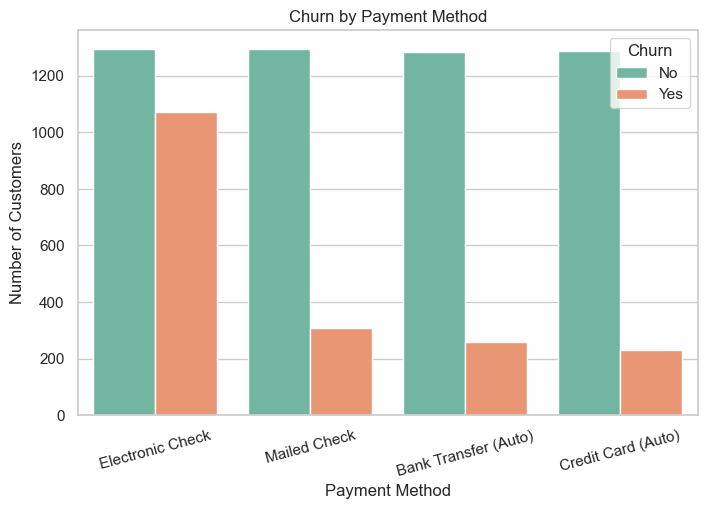

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='paymentmethod', hue='churn', palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.legend(title='Churn')
plt.show()

## 📌 Conclusion & Key Business Insights.

After exploring and analyzing the telecom customer data, here are the key findings:

1. 🔻 **Churn Rate**: The overall churn rate is around **27%**, indicating a significant retention issue.

2. 📅 **Contract Type Impact**: 
   - **Month-to-month** users are far more likely to churn compared to those with **one- or two-year contracts**.
   - Suggestion: Offer incentives for longer contracts.

3. 💳 **Payment Method**:
   - Users paying via **Electronic Check** showed the **highest churn**.
   - Suggestion: Promote **auto-payment methods** like bank transfer or credit card.

4. 🌐 **Internet Service**:
   - Customers using **Fiber Optic** services churned more than DSL or those without internet.
   - Suggestion: Investigate customer experience & pricing for Fiber Optic users.

5. 📈 **Tenure & Charges**:
   - Users with **shorter tenures** and **higher monthly charges** are more likely to churn.
   - Suggestion: Target new users with loyalty offers or discounts early on.


## 💼 Business Value

These insights can help the telecom company:
- Improve **customer retention**,
- Optimize **pricing and payment plans**,
- Tailor **marketing strategies** for high-risk segments.